In [1]:
from discrete import *
import numpy as np 
from numpy.random import randint, rand
import matplotlib.pyplot as plt


In [3]:
def count_infected(pop):
    return sum(p.is_infected() for p in pop)

def count_recovered(pop):
    return sum(p.is_recovered() for p in pop)

def count_susc(pop):
    return sum(p.is_susceptible() for p in pop)

def run_simulation(b, k, N=1_000, T=20):
    """
    return the number of people S, I and R at time T
    """
    
    pop = [Agent() for i in range(N)] # our population
    pop[0].infect()
    counts_sus = [count_susc(pop)]
    counts_inf = [count_infected(pop)]
    counts_rec = [count_recovered(pop)]
    for t in range(T):
    # update the population
        for i in range(N):
            if pop[i].is_infected():
                for j in range(N):
                    if pop[j].is_susceptible():
                        if rand() < b:
                            pop[j].infect()        
                if rand() < k:
                    pop[i].recover()   
        counts_sus.append(count_susc(pop))
        counts_inf.append(count_infected(pop))
        counts_rec.append(count_recovered(pop))

    return counts_sus, counts_inf, counts_rec



Plot for b = 0.0001 and k = 0.03


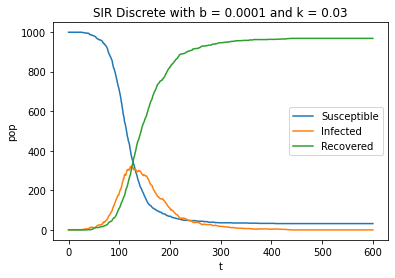

Plot for b = 0.0001 and k = 0.04


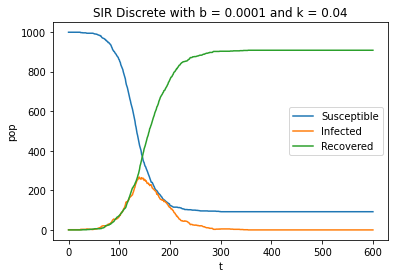

Plot for b = 0.0001 and k = 0.05


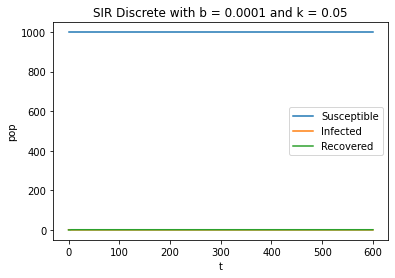

Plot for b = 0.0001 and k = 0.06


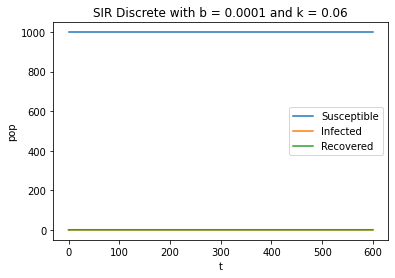

In [12]:
# bs = [0.005, 0.0005, 0.0003, 0.0001]
# ks = [0.5, 0.1, 0.01, 0.001]
# Nice graph, everyone gets sick: b = 0.0001, k = 0.01
# No one gets sick: b = 0.0001 and k = 0.1
# Slow recovery: b = 0.0003 and k = 0.001
# Not everyone gets sick: b = 0.0001 and k = 0.04

# to try
bs = [0.0001]
ks = [0.03, 0.04, 0.05, 0.06]
for b in bs:
    for k in ks:
        print("Plot for b = {} and k = {}".format(b, k))
        counts_sus, counts_inf, counts_rec = run_simulation(b, k, T=600, N=1000)
        plt.plot(counts_sus, label='Susceptible')
        plt.plot(counts_inf, label='Infected')
        plt.plot(counts_rec, label='Recovered')
        plt.xlabel('t')
        plt.ylabel('pop')
        plt.title('SIR Discrete with b = {} and k = {}'.format(b, k))
        plt.legend()
        plt.show()

In [ ]:
cts

In [ ]:
# alternate way to do the plotting
T = 100 # number of days to simulate
b = 0.01
k = 0.05
N = 1000

pop = [Agent() for i in range(N)]
pop[0].infect()
counts = [count_infected(pop)]
for t in range(T):
    # update the population
    for i in range(N):
        if pop[i].is_infected():
            for j in range(N):
                if pop[j].is_susceptible():
                    if rand() < b:
                        pop[j].infect()        
            if rand() < k:
                pop[i].recover()                    
    # add to our counts
    counts.append(count_infected(pop))

plt.plot(counts)
plt.show()
plt.clf()

I am running


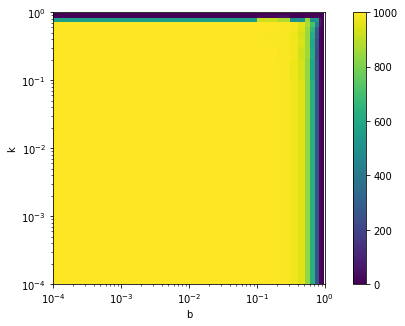

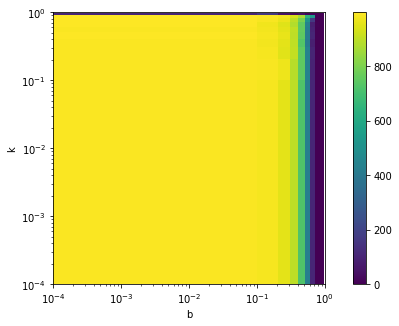

In [ ]:
# Phase Diagram Code
print('I am running')
def run_simulation_phase(b, k, N=1_000, T=10):
    """
    return the number of people infected at time T
    """
    pop = [Agent() for i in range(N)] # our population
    pop[0].infect()
    for t in range(T):
    # update the population
        for i in range(N):
            if pop[i].is_infected():
                for j in range(N):
                    if pop[j].is_susceptible():
                        if rand() < b:
                            pop[j].infect()        
                if rand() < k:
                    pop[i].recover()  
    return count_infected(pop)

Ts = [10, 50, 100, 300, 600]

for t in Ts:
    bs = np.logspace(-4, 0, 10)
    ks = np.logspace(-4, 0, 10)
    cts = np.zeros((len(bs), len(ks)))
    for i, b in enumerate(bs):
        for j, k in enumerate(ks):
            cts[i,j] = run_simulation_phase(b, k, T = t)
    plt.figure(figsize=(10,5))
    plt.imshow(cts, extent=[np.min(bs), np.max(bs), np.min(ks), np.max(ks)])
    plt.colorbar()
    # plt.axis('square')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('b')
    plt.ylabel('k')
    plt.show()